# Leonard Kramer Problem
This notebook is for the general audience. As so, some basic necessary process engineering concepts are briefly introduced for the sake of comprehension. If you are already familiar with these concepts, feel free to skip these explanatory sections. This notebook focuses on the machine learning analisys to solve this specific problem.
## Deep learning application to process engineering problems
The Leonard Kramer problem is a toy problem related to the fields of process fault identification and detection in the field of chemical processes. Proposed by [Leonard & Kramer, 1991](http://ieeexplore.ieee.org/document/75576/), it brings ease of visualization and a comprehensive parametric generation of patterns which closely approximates real life examples of process faults.

### Process industries
The chemical process industry is responsible to transform raw material into comercial products. Some examples of transformations are:

|Raw Material|Product|
|---|---|
|Oil|Gasoline,Diesel,Plastics|
|Starch,Yeast,Water|Beer,Wine,Spirits|
|Ore|Metals|
|Sulfur,Water|Sulfuric Acid|
|Fat,Soda|Soap|
|Vegetables|Sugar|
|Leaves,Fruits|Essencial oils|

In order to achieve these transformations in large scale and in a continuous/semi-continuous fashion, several industrial level equipment must be arranged in a complex manner. Some examples of industrial equipment are storage tanks, chemical reactors, distillation columns, heaters, coolers, furnaces, pressure vessels and so on. <br>
Now, in order yield a constant quality product, the industrial staff's main goal is to ensure that all conditions in all of the equipment remain constant, regardless of the external influences on the process. For the sake of generality, these conditions are called <b>process variables</b>. Some example of process variables are temperature, pressure, flow rate, density, concentration etc.<br>
Since most of the current industrial process plants contain dozens of equipment, maintaining all process variables in harmony takes a huge amount of effort. Thanks to computation, most of these processes are already highly automated, so fewer human supervision and intervention in the process is required. However, two jobs remain mostly dependant on human intervention, the one to design such processes and the one to diagnose failure on the several process components. This notebook covers the second type of problem.

### Fault detection and diagnosys
Suppose you own a wine factory. Your customers expect the greatest of quality standards on your product. They also expect that the next bottle they buy has the same taste than the last one they consumed. However, your process is succeptible to various factors such as the farm you buy your grapes from, ambient temperature and humidity, tap water temperature etc. You consulted an expert and he told you that the main process variables you should be concerned are the wine's sweetness and tanins concentration. So, if you notice any change in those two <b>process variables</b> during the production batch, you should readily intervene.<br>
The first problem arises when you realize that it is very difficult/expensive to measure these process variables in real time. So you hire another expert (tipically an engineer), to help you with this task. This expert tells you that, instead of spending thousands to read these variables on-line, you can spend a few dollars on equipment to read the temperature and alcohol content (usually by reading the wine density) on your fermentation drum. Moreover, you can easily buy some control equipment that will read the temperature for you and actuate some heater/cooler in case you have any problems with tmperature and add some sugar/water in case you have any problem with alcohol concentration. Problem solved, you are happy, the expert is happy, the customer is happy and your bank account is happy, right? Not so fast.<br>
Equipment break, thermometers break, valves break, electronic circuits crash, workers sleep and so on and so forth. When problems like these arise, it's usually a human being who is responsible to diagnose the root causes. Now, for a wine factory, maybe it's an easy task for anyone with enough experience in the process. However, for complex operations like oil fractioning into liquefied gas, nafta, gasoline, diesel, light oil, heavy oil and asphalt, there are so many things that can cause any given problem that the human effort to diagnose the problem may take days. And, as Uncle Sam says, time is money! Wouldn it be nice to have an artificial intelligence to make such diagnosis for us? Yes, and this is the topic of this notebook. Below we treat the wine factory problem because it is easy and intuitive to deal with only two variables. However, the same reasoning we apply here can be expanded to deal with more complex process industries, such as the above mentioned oil refinery.

### Our wine factory
Remember that, in the wine factory, the most important quality indicators were the wine's <b>sweetness</b> and <b>tanins</b>? Remember also that, instead of monitoring those two quantities, we chose to monitor the fermentation drum's <b>temperature</b> and <b>alcohol concentration</b>? If something goes wrong with the operation, how do we relate the former <b>process variables</b> with the latter? Well, we will make a simplistic assumption that they relate almost linearly:<br><br>
$$Temperature = 25°C + \alpha_1 *Sweetness + \alpha_2 *Tanins \quad \textrm{(1)}$$
$$Alc. Concentration = 10\% + \alpha_3 *Sweetness - \alpha_4 * Tanins \quad \textrm{(2)}$$
<br><br>
Where $\alpha_i$ are correlational parameters. Now, in order to facilitate our problem visualization, we can subtract all four process variables by their baseline values (previously estabilished by our enologist and our engineer) so that the value is zero when operating in normal conditions and nonzero otherwise and divide them by a factor $\beta_i$ to ignore the effect of their scale.
<br><br>
$$T = (Temperature - 25°C)/\beta_1$$
$$C = (Alc. Concentration - 10\%)/\beta_2$$
$$S = (Sweetness - 3g/L)/\beta_3$$
$$tan = (Tanin - 500mg/L)/\beta_4$$
<br><br>
How $\alpha_i$ relates to $\beta_j$ is not in the scope of this work. Now, we can rewrite (1) and (2) in their dimensionless scaled form to:<br><br>
$$T=S+tan$$
$$C=S-tan$$
<br><br>
We have now defined our problem. As long as T and C remains equal to zero, our process is working fine.

### Generating faults
Generating the faults is pretty straightforward. We assume that at any given moment, $S$ and $tan$ behave under a random gaussian distribution $\mathcal{N}(0,0.25)$. Since requiring them to be specifically $0$ is nearly impossible, we may establish a tolerance of $+- 0.05$.
<br><br>
$$Normal: \left| S \right|<0.05, \left| tan \right|<0.05$$
<br><br>
So, whatever faults occur in the process will most likely make the wine have a positive or negative displacement on it's sweetness and alcoholic content beyont this treshold. Since many different faults may occur, we will focus on two generic types of faults: <br><br>
<br><br>
$$Type 1: \left| S \right|>0.05, \left| tan \right|<0.05$$
$$Type 2: \left| S \right|<0.05, \left| tan \right|>0.05$$
<br><br>
We now are able to generate a chart of operating conditions in the $(S,tan)$ space.

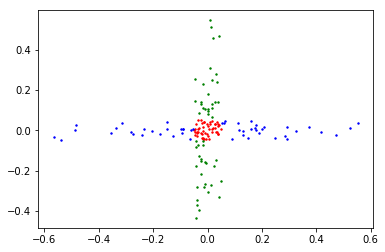

In [2]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=6,suppress=True)
%matplotlib inline
n = 150 # of Patterns (multiple of 3)
patterns = np.zeros([n,5])
count = 0
i=[0,int(n/3),int(2*n/3),int(n)]
sd1=.25
tr=.05
np.random.seed(1234)
def cond(p1,p2,flag): 
    if flag==1: # Normal operating conditions
        return(abs(p1)<tr and abs(p2)<tr)
    elif flag==2: #Type 1 error
        return(abs(p1)>tr and abs(p2)<tr)
    elif flag==3: #Type 2 error
        return(abs(p1)<tr and abs(p2)>tr)
for pos,idx in enumerate(i):
    while count < idx:
        p1 = np.random.normal(0,sd1)
        p2 = np.random.normal(0,sd1)
        if cond(p1,p2,pos):
            patterns[count,0] = p1
            patterns[count,1] = p2
            patterns[count,pos+1] = 1
            count += 1
plt.scatter(patterns[i[0]:i[1],0],patterns[i[0]:i[1],1],c='r',s=2)
plt.scatter(patterns[i[1]:i[2],0],patterns[i[1]:i[2],1],c='b',s=2)
plt.scatter(patterns[i[2]:i[3],0],patterns[i[2]:i[3],1],c='g',s=2)
plt.show()

We said above that the relationship between $(S,tan)$ and $(T,C)$ was "almost" linear. It is not exacly linear because of the absolute value operator on the state variables, due to the +- 0.05 tresholld. So, a correct visualization of the operating conditions on the $(S,tan)$ space is:

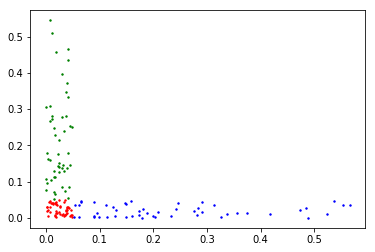

In [3]:
plt.scatter(np.absolute(patterns[i[0]:i[1],0]),np.absolute(patterns[i[0]:i[1],1]),c='r',s=2)
plt.scatter(np.absolute(patterns[i[1]:i[2],0]),np.absolute(patterns[i[1]:i[2],1]),c='b',s=2)
plt.scatter(np.absolute(patterns[i[2]:i[3],0]),np.absolute(patterns[i[2]:i[3],1]),c='g',s=2)
plt.show()

Now, making $x=(T,C)$, we can view our process fault diagnosis chart in the $(T,C)$ space.

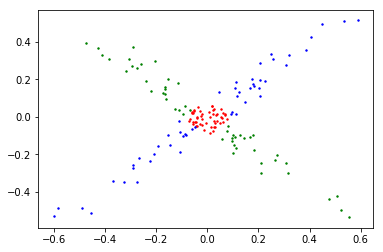

In [4]:
x = np.zeros([n,5])
for idi in range(len(patterns)):
    x[idi,0] = patterns[idi,0] + patterns[idi,1]
    x[idi,1] = patterns[idi,0] - patterns[idi,1]
    x[idi,2:] = patterns[idi,2:]
plt.scatter(x[i[0]:i[1],0],x[i[0]:i[1],1],c='r',s=2)
plt.scatter(x[i[1]:i[2],0],x[i[1]:i[2],1],c='b',s=2)
plt.scatter(x[i[2]:i[3],0],x[i[2]:i[3],1],c='g',s=2)
plt.show()

### Applying ANNs
According to Bengio et al. 2016, one of the modern interpretations of deep learning is that they are a composition of functions. One can interpret any given layer of a neural network as applying a nonlinear transformation $\mathbb{R}^n \rightarrow \mathbb{R}^m$ of the type:
<br><br>
$$Y = f(X)$$
<br><br>
where $X \in \mathbb{R}^n$, $f,Y \in \mathbb{R}^m$ and $f$ is to be found by adaptive learning. So, when you implement many layers of a neural network, you are actually making a composite function $f_1(f_2(f_3(...f_k(x))))$. By analogy, in the classification problem, it's like you are folding the space in many different forms consecutively untill you can properly separate the space in identifiable regions. This is what we will try to accomplish here.

First of all, we train a single hidden layer artificial neural network (will call it MLP from now on). For the sake of data visualization we use only two neurons in the hidden layer in order to plot them on a cartesian plane.

In [5]:
from keras.models import Model
from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import winsound

Using TensorFlow backend.


In [28]:
%%time
data = x[:,0:2]
target = x[:,2:]
np.random.seed(321)
model = Sequential()
model.add(Dense(units=2, activation='tanh', input_dim=2,name="l1"))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
callbacks = ModelCheckpoint('bestfit.hdf5',save_best_only=True)
history = model.fit(data, target, epochs=2000, batch_size=1,verbose=1,callbacks=[callbacks],validation_data=(data,target))
loss_and_metrics = model.evaluate(data, target)
print(loss_and_metrics)
winsound.Beep(2500,200)

Train on 150 samples, validate on 150 samples
Epoch 1/2000
150/150 [==============================] - 0s - loss: 1.1289 - acc: 0.3800 - val_loss: 1.1209 - val_acc: 0.5933
Epoch 2/2000
150/150 [==============================] - 0s - loss: 1.1243 - acc: 0.6000 - val_loss: 1.1166 - val_acc: 0.5533
Epoch 3/2000
150/150 [==============================] - 0s - loss: 1.1197 - acc: 0.6000 - val_loss: 1.1132 - val_acc: 0.4733
Epoch 4/2000
150/150 [==============================] - 0s - loss: 1.1166 - acc: 0.4667 - val_loss: 1.1098 - val_acc: 0.5733
Epoch 5/2000
150/150 [==============================] - 0s - loss: 1.1139 - acc: 0.5333 - val_loss: 1.1069 - val_acc: 0.6067
Epoch 6/2000
150/150 [==============================] - 0s - loss: 1.1111 - acc: 0.5267 - val_loss: 1.1046 - val_acc: 0.6267
Epoch 7/2000
150/150 [==============================] - 0s - loss: 1.1088 - acc: 0.5667 - val_loss: 1.1025 - val_acc: 0.5933
Epoch 8/2000
150/150 [==============================] - 0s - loss: 1.1065 - acc

150/150 [==============================] - 0s - loss: 1.0183 - acc: 0.5800 - val_loss: 1.0101 - val_acc: 0.6200
Epoch 66/2000
150/150 [==============================] - 0s - loss: 1.0164 - acc: 0.6067 - val_loss: 1.0080 - val_acc: 0.6400
Epoch 67/2000
150/150 [==============================] - 0s - loss: 1.0121 - acc: 0.4600 - val_loss: 1.0065 - val_acc: 0.6000
Epoch 68/2000
150/150 [==============================] - 0s - loss: 1.0123 - acc: 0.5733 - val_loss: 1.0042 - val_acc: 0.6067
Epoch 69/2000
150/150 [==============================] - 0s - loss: 1.0100 - acc: 0.5600 - val_loss: 1.0021 - val_acc: 0.6067
Epoch 70/2000
150/150 [==============================] - 0s - loss: 1.0083 - acc: 0.5933 - val_loss: 1.0000 - val_acc: 0.6133
Epoch 71/2000
150/150 [==============================] - 0s - loss: 1.0063 - acc: 0.6000 - val_loss: 0.9980 - val_acc: 0.6200
Epoch 72/2000
150/150 [==============================] - 0s - loss: 1.0030 - acc: 0.6000 - val_loss: 0.9957 - val_acc: 0.6400
Epoch 

150/150 [==============================] - 0s - loss: 0.9245 - acc: 0.5800 - val_loss: 0.9183 - val_acc: 0.6200
Epoch 130/2000
150/150 [==============================] - 0s - loss: 0.9249 - acc: 0.6067 - val_loss: 0.9171 - val_acc: 0.6200
Epoch 131/2000
150/150 [==============================] - 0s - loss: 0.9238 - acc: 0.6333 - val_loss: 0.9162 - val_acc: 0.6200
Epoch 132/2000
150/150 [==============================] - 0s - loss: 0.9224 - acc: 0.6133 - val_loss: 0.9156 - val_acc: 0.6467
Epoch 133/2000
150/150 [==============================] - 0s - loss: 0.9220 - acc: 0.5933 - val_loss: 0.9147 - val_acc: 0.6200
Epoch 134/2000
150/150 [==============================] - 0s - loss: 0.9201 - acc: 0.5800 - val_loss: 0.9144 - val_acc: 0.6267
Epoch 135/2000
150/150 [==============================] - 0s - loss: 0.9208 - acc: 0.6200 - val_loss: 0.9131 - val_acc: 0.6333
Epoch 136/2000
150/150 [==============================] - 0s - loss: 0.9200 - acc: 0.6133 - val_loss: 0.9120 - val_acc: 0.6267

150/150 [==============================] - 0s - loss: 0.8855 - acc: 0.6133 - val_loss: 0.8779 - val_acc: 0.6200
Epoch 194/2000
150/150 [==============================] - 0s - loss: 0.8833 - acc: 0.6067 - val_loss: 0.8779 - val_acc: 0.6333
Epoch 195/2000
150/150 [==============================] - 0s - loss: 0.8844 - acc: 0.6067 - val_loss: 0.8768 - val_acc: 0.6200
Epoch 196/2000
150/150 [==============================] - 0s - loss: 0.8831 - acc: 0.6267 - val_loss: 0.8765 - val_acc: 0.6333
Epoch 197/2000
150/150 [==============================] - 0s - loss: 0.8836 - acc: 0.6267 - val_loss: 0.8760 - val_acc: 0.6333
Epoch 198/2000
150/150 [==============================] - 0s - loss: 0.8823 - acc: 0.6267 - val_loss: 0.8758 - val_acc: 0.6467
Epoch 199/2000
150/150 [==============================] - 0s - loss: 0.8815 - acc: 0.6133 - val_loss: 0.8753 - val_acc: 0.6200
Epoch 200/2000
150/150 [==============================] - 0s - loss: 0.8808 - acc: 0.6067 - val_loss: 0.8754 - val_acc: 0.6333

150/150 [==============================] - 0s - loss: 0.8624 - acc: 0.6200 - val_loss: 0.8550 - val_acc: 0.6200
Epoch 258/2000
150/150 [==============================] - 0s - loss: 0.8621 - acc: 0.6200 - val_loss: 0.8547 - val_acc: 0.6400
Epoch 259/2000
150/150 [==============================] - 0s - loss: 0.8614 - acc: 0.6400 - val_loss: 0.8547 - val_acc: 0.6267
Epoch 260/2000
150/150 [==============================] - 0s - loss: 0.8616 - acc: 0.6200 - val_loss: 0.8544 - val_acc: 0.6200
Epoch 261/2000
150/150 [==============================] - 0s - loss: 0.8599 - acc: 0.6200 - val_loss: 0.8544 - val_acc: 0.6467
Epoch 262/2000
150/150 [==============================] - 0s - loss: 0.8607 - acc: 0.6200 - val_loss: 0.8543 - val_acc: 0.6467
Epoch 263/2000
150/150 [==============================] - 0s - loss: 0.8603 - acc: 0.6267 - val_loss: 0.8535 - val_acc: 0.6333
Epoch 264/2000
150/150 [==============================] - 0s - loss: 0.8596 - acc: 0.6467 - val_loss: 0.8532 - val_acc: 0.6200

150/150 [==============================] - 0s - loss: 0.8473 - acc: 0.6133 - val_loss: 0.8398 - val_acc: 0.6200
Epoch 322/2000
150/150 [==============================] - 0s - loss: 0.8468 - acc: 0.6200 - val_loss: 0.8397 - val_acc: 0.6400
Epoch 323/2000
150/150 [==============================] - 0s - loss: 0.8435 - acc: 0.6267 - val_loss: 0.8413 - val_acc: 0.6267
Epoch 324/2000
150/150 [==============================] - 0s - loss: 0.8473 - acc: 0.6333 - val_loss: 0.8395 - val_acc: 0.6400
Epoch 325/2000
150/150 [==============================] - 0s - loss: 0.8457 - acc: 0.6267 - val_loss: 0.8398 - val_acc: 0.6333
Epoch 326/2000
150/150 [==============================] - 0s - loss: 0.8460 - acc: 0.6333 - val_loss: 0.8389 - val_acc: 0.6200
Epoch 327/2000
150/150 [==============================] - 0s - loss: 0.8457 - acc: 0.6200 - val_loss: 0.8389 - val_acc: 0.6400
Epoch 328/2000
150/150 [==============================] - 0s - loss: 0.8454 - acc: 0.6200 - val_loss: 0.8387 - val_acc: 0.6333

150/150 [==============================] - 0s - loss: 0.8353 - acc: 0.6267 - val_loss: 0.8293 - val_acc: 0.6200
Epoch 386/2000
150/150 [==============================] - 0s - loss: 0.8346 - acc: 0.6267 - val_loss: 0.8297 - val_acc: 0.6200
Epoch 387/2000
150/150 [==============================] - 0s - loss: 0.8362 - acc: 0.6267 - val_loss: 0.8285 - val_acc: 0.6267
Epoch 388/2000
150/150 [==============================] - 0s - loss: 0.8350 - acc: 0.6267 - val_loss: 0.8284 - val_acc: 0.6200
Epoch 389/2000
150/150 [==============================] - 0s - loss: 0.8352 - acc: 0.6200 - val_loss: 0.8282 - val_acc: 0.6333
Epoch 390/2000
150/150 [==============================] - 0s - loss: 0.8343 - acc: 0.6000 - val_loss: 0.8284 - val_acc: 0.6200
Epoch 391/2000
150/150 [==============================] - 0s - loss: 0.8353 - acc: 0.6267 - val_loss: 0.8279 - val_acc: 0.6333
Epoch 392/2000
150/150 [==============================] - 0s - loss: 0.8350 - acc: 0.6333 - val_loss: 0.8278 - val_acc: 0.6267

150/150 [==============================] - 0s - loss: 0.8266 - acc: 0.6067 - val_loss: 0.8204 - val_acc: 0.6267
Epoch 450/2000
150/150 [==============================] - 0s - loss: 0.8266 - acc: 0.6200 - val_loss: 0.8207 - val_acc: 0.6200
Epoch 451/2000
150/150 [==============================] - 0s - loss: 0.8264 - acc: 0.6267 - val_loss: 0.8202 - val_acc: 0.6333
Epoch 452/2000
150/150 [==============================] - 0s - loss: 0.8262 - acc: 0.6133 - val_loss: 0.8202 - val_acc: 0.6400
Epoch 453/2000
150/150 [==============================] - 0s - loss: 0.8265 - acc: 0.6200 - val_loss: 0.8201 - val_acc: 0.6400
Epoch 454/2000
150/150 [==============================] - 0s - loss: 0.8273 - acc: 0.6333 - val_loss: 0.8197 - val_acc: 0.6333
Epoch 455/2000
150/150 [==============================] - 0s - loss: 0.8271 - acc: 0.6333 - val_loss: 0.8196 - val_acc: 0.6333
Epoch 456/2000
150/150 [==============================] - 0s - loss: 0.8264 - acc: 0.6400 - val_loss: 0.8195 - val_acc: 0.6333

150/150 [==============================] - 0s - loss: 0.8193 - acc: 0.6200 - val_loss: 0.8144 - val_acc: 0.6200
Epoch 514/2000
150/150 [==============================] - 0s - loss: 0.8193 - acc: 0.6267 - val_loss: 0.8136 - val_acc: 0.6333
Epoch 515/2000
150/150 [==============================] - 0s - loss: 0.8199 - acc: 0.6267 - val_loss: 0.8134 - val_acc: 0.6333
Epoch 516/2000
150/150 [==============================] - 0s - loss: 0.8181 - acc: 0.6133 - val_loss: 0.8139 - val_acc: 0.6200
Epoch 517/2000
150/150 [==============================] - 0s - loss: 0.8196 - acc: 0.6200 - val_loss: 0.8132 - val_acc: 0.63330.6
Epoch 518/2000
150/150 [==============================] - 0s - loss: 0.8192 - acc: 0.6200 - val_loss: 0.8133 - val_acc: 0.6267
Epoch 519/2000
150/150 [==============================] - 0s - loss: 0.8201 - acc: 0.6267 - val_loss: 0.8129 - val_acc: 0.6333
Epoch 520/2000
150/150 [==============================] - 0s - loss: 0.8196 - acc: 0.6200 - val_loss: 0.8129 - val_acc: 0.6

150/150 [==============================] - 0s - loss: 0.8151 - acc: 0.6333 - val_loss: 0.8077 - val_acc: 0.6333
Epoch 578/2000
150/150 [==============================] - 0s - loss: 0.8140 - acc: 0.6267 - val_loss: 0.8081 - val_acc: 0.6467
Epoch 579/2000
150/150 [==============================] - 0s - loss: 0.8145 - acc: 0.6333 - val_loss: 0.8076 - val_acc: 0.6267
Epoch 580/2000
150/150 [==============================] - 0s - loss: 0.8124 - acc: 0.6333 - val_loss: 0.8085 - val_acc: 0.6200
Epoch 581/2000
150/150 [==============================] - 0s - loss: 0.8147 - acc: 0.6267 - val_loss: 0.8080 - val_acc: 0.6200
Epoch 582/2000
150/150 [==============================] - 0s - loss: 0.8148 - acc: 0.6200 - val_loss: 0.8076 - val_acc: 0.6267
Epoch 583/2000
150/150 [==============================] - 0s - loss: 0.8139 - acc: 0.6200 - val_loss: 0.8075 - val_acc: 0.6333
Epoch 584/2000
150/150 [==============================] - 0s - loss: 0.8142 - acc: 0.6333 - val_loss: 0.8073 - val_acc: 0.6267

150/150 [==============================] - 0s - loss: 0.8081 - acc: 0.6133 - val_loss: 0.8034 - val_acc: 0.6267
Epoch 642/2000
150/150 [==============================] - 0s - loss: 0.8097 - acc: 0.6333 - val_loss: 0.8031 - val_acc: 0.6267
Epoch 643/2000
150/150 [==============================] - 0s - loss: 0.8087 - acc: 0.6267 - val_loss: 0.8029 - val_acc: 0.6333
Epoch 644/2000
150/150 [==============================] - 0s - loss: 0.8100 - acc: 0.6333 - val_loss: 0.8028 - val_acc: 0.6333
Epoch 645/2000
150/150 [==============================] - 0s - loss: 0.8076 - acc: 0.6067 - val_loss: 0.8040 - val_acc: 0.6267
Epoch 646/2000
150/150 [==============================] - 0s - loss: 0.8096 - acc: 0.6267 - val_loss: 0.8029 - val_acc: 0.6267
Epoch 647/2000
150/150 [==============================] - 0s - loss: 0.8073 - acc: 0.6133 - val_loss: 0.8036 - val_acc: 0.6400
Epoch 648/2000
150/150 [==============================] - 0s - loss: 0.8097 - acc: 0.6267 - val_loss: 0.8031 - val_acc: 0.6267

150/150 [==============================] - 0s - loss: 0.8046 - acc: 0.6133 - val_loss: 0.7987 - val_acc: 0.6400
Epoch 706/2000
150/150 [==============================] - 0s - loss: 0.8054 - acc: 0.6333 - val_loss: 0.7985 - val_acc: 0.6267
Epoch 707/2000
150/150 [==============================] - 0s - loss: 0.8056 - acc: 0.6400 - val_loss: 0.7984 - val_acc: 0.6333
Epoch 708/2000
150/150 [==============================] - 0s - loss: 0.8049 - acc: 0.6200 - val_loss: 0.7985 - val_acc: 0.6400
Epoch 709/2000
150/150 [==============================] - 0s - loss: 0.8049 - acc: 0.6333 - val_loss: 0.7983 - val_acc: 0.6333
Epoch 710/2000
150/150 [==============================] - 0s - loss: 0.8044 - acc: 0.6267 - val_loss: 0.7986 - val_acc: 0.6533
Epoch 711/2000
150/150 [==============================] - 0s - loss: 0.8041 - acc: 0.6400 - val_loss: 0.7985 - val_acc: 0.6267
Epoch 712/2000
150/150 [==============================] - 0s - loss: 0.8034 - acc: 0.6267 - val_loss: 0.7991 - val_acc: 0.6400

150/150 [==============================] - 0s - loss: 0.8009 - acc: 0.6400 - val_loss: 0.7958 - val_acc: 0.6267
Epoch 770/2000
150/150 [==============================] - 0s - loss: 0.8020 - acc: 0.6200 - val_loss: 0.7950 - val_acc: 0.6267
Epoch 771/2000
150/150 [==============================] - 0s - loss: 0.8005 - acc: 0.6267 - val_loss: 0.7958 - val_acc: 0.6333
Epoch 772/2000
150/150 [==============================] - 0s - loss: 0.8022 - acc: 0.6200 - val_loss: 0.7947 - val_acc: 0.6267
Epoch 773/2000
150/150 [==============================] - 0s - loss: 0.8015 - acc: 0.6333 - val_loss: 0.7949 - val_acc: 0.6267
Epoch 774/2000
150/150 [==============================] - 0s - loss: 0.8008 - acc: 0.6267 - val_loss: 0.7948 - val_acc: 0.6533
Epoch 775/2000
150/150 [==============================] - 0s - loss: 0.8004 - acc: 0.6133 - val_loss: 0.7948 - val_acc: 0.6333
Epoch 776/2000
150/150 [==============================] - 0s - loss: 0.8009 - acc: 0.6200 - val_loss: 0.7946 - val_acc: 0.6533

150/150 [==============================] - 0s - loss: 0.7972 - acc: 0.6200 - val_loss: 0.7920 - val_acc: 0.6400
Epoch 834/2000
150/150 [==============================] - 0s - loss: 0.7986 - acc: 0.6400 - val_loss: 0.7915 - val_acc: 0.6267
Epoch 835/2000
150/150 [==============================] - 0s - loss: 0.7980 - acc: 0.6400 - val_loss: 0.7917 - val_acc: 0.6267
Epoch 836/2000
150/150 [==============================] - 0s - loss: 0.7987 - acc: 0.6200 - val_loss: 0.7914 - val_acc: 0.6267
Epoch 837/2000
150/150 [==============================] - 0s - loss: 0.7980 - acc: 0.6333 - val_loss: 0.7915 - val_acc: 0.6333
Epoch 838/2000
150/150 [==============================] - 0s - loss: 0.7979 - acc: 0.6267 - val_loss: 0.7914 - val_acc: 0.6400
Epoch 839/2000
150/150 [==============================] - 0s - loss: 0.7985 - acc: 0.6267 - val_loss: 0.7913 - val_acc: 0.6533
Epoch 840/2000
150/150 [==============================] - 0s - loss: 0.7970 - acc: 0.6200 - val_loss: 0.7917 - val_acc: 0.6267

150/150 [==============================] - 0s - loss: 0.7957 - acc: 0.6333 - val_loss: 0.7888 - val_acc: 0.6267
Epoch 898/2000
150/150 [==============================] - 0s - loss: 0.7946 - acc: 0.6333 - val_loss: 0.7889 - val_acc: 0.6267
Epoch 899/2000
150/150 [==============================] - 0s - loss: 0.7953 - acc: 0.6200 - val_loss: 0.7891 - val_acc: 0.6267
Epoch 900/2000
150/150 [==============================] - 0s - loss: 0.7957 - acc: 0.6400 - val_loss: 0.7885 - val_acc: 0.6267
Epoch 901/2000
150/150 [==============================] - 0s - loss: 0.7953 - acc: 0.6333 - val_loss: 0.7886 - val_acc: 0.6400
Epoch 902/2000
150/150 [==============================] - 0s - loss: 0.7944 - acc: 0.6267 - val_loss: 0.7884 - val_acc: 0.6467
Epoch 903/2000
150/150 [==============================] - 0s - loss: 0.7954 - acc: 0.6400 - val_loss: 0.7885 - val_acc: 0.6533
Epoch 904/2000
150/150 [==============================] - 0s - loss: 0.7950 - acc: 0.6267 - val_loss: 0.7884 - val_acc: 0.6400

150/150 [==============================] - 0s - loss: 0.7925 - acc: 0.6400 - val_loss: 0.7861 - val_acc: 0.6333
Epoch 962/2000
150/150 [==============================] - 0s - loss: 0.7916 - acc: 0.6267 - val_loss: 0.7863 - val_acc: 0.6467
Epoch 963/2000
150/150 [==============================] - 0s - loss: 0.7931 - acc: 0.6467 - val_loss: 0.7860 - val_acc: 0.6467
Epoch 964/2000
150/150 [==============================] - 0s - loss: 0.7924 - acc: 0.6400 - val_loss: 0.7861 - val_acc: 0.6467
Epoch 965/2000
150/150 [==============================] - 0s - loss: 0.7923 - acc: 0.6400 - val_loss: 0.7860 - val_acc: 0.6467
Epoch 966/2000
150/150 [==============================] - 0s - loss: 0.7924 - acc: 0.6200 - val_loss: 0.7857 - val_acc: 0.6400
Epoch 967/2000
150/150 [==============================] - 0s - loss: 0.7927 - acc: 0.6333 - val_loss: 0.7856 - val_acc: 0.6400
Epoch 968/2000
150/150 [==============================] - 0s - loss: 0.7925 - acc: 0.6333 - val_loss: 0.7856 - val_acc: 0.6400

150/150 [==============================] - 0s - loss: 0.7909 - acc: 0.6400 - val_loss: 0.7836 - val_acc: 0.6267
Epoch 1026/2000
150/150 [==============================] - 0s - loss: 0.7894 - acc: 0.6400 - val_loss: 0.7836 - val_acc: 0.6400
Epoch 1027/2000
150/150 [==============================] - 0s - loss: 0.7899 - acc: 0.6467 - val_loss: 0.7835 - val_acc: 0.6400
Epoch 1028/2000
150/150 [==============================] - 0s - loss: 0.7900 - acc: 0.6333 - val_loss: 0.7835 - val_acc: 0.6400
Epoch 1029/2000
150/150 [==============================] - 0s - loss: 0.7904 - acc: 0.6400 - val_loss: 0.7833 - val_acc: 0.6467
Epoch 1030/2000
150/150 [==============================] - 0s - loss: 0.7891 - acc: 0.6400 - val_loss: 0.7838 - val_acc: 0.6400
Epoch 1031/2000
150/150 [==============================] - 0s - loss: 0.7898 - acc: 0.6400 - val_loss: 0.7838 - val_acc: 0.6467
Epoch 1032/2000
150/150 [==============================] - 0s - loss: 0.7902 - acc: 0.6400 - val_loss: 0.7832 - val_acc:

150/150 [==============================] - 0s - loss: 0.7880 - acc: 0.6400 - val_loss: 0.7813 - val_acc: 0.6333
Epoch 1090/2000
150/150 [==============================] - 0s - loss: 0.7877 - acc: 0.6267 - val_loss: 0.7811 - val_acc: 0.6467
Epoch 1091/2000
150/150 [==============================] - 0s - loss: 0.7871 - acc: 0.6333 - val_loss: 0.7816 - val_acc: 0.6467
Epoch 1092/2000
150/150 [==============================] - 0s - loss: 0.7879 - acc: 0.6400 - val_loss: 0.7813 - val_acc: 0.6467
Epoch 1093/2000
150/150 [==============================] - 0s - loss: 0.7878 - acc: 0.6400 - val_loss: 0.7811 - val_acc: 0.6400
Epoch 1094/2000
150/150 [==============================] - 0s - loss: 0.7877 - acc: 0.6400 - val_loss: 0.7811 - val_acc: 0.6467
Epoch 1095/2000
150/150 [==============================] - 0s - loss: 0.7880 - acc: 0.6267 - val_loss: 0.7810 - val_acc: 0.6467
Epoch 1096/2000
150/150 [==============================] - 0s - loss: 0.7878 - acc: 0.6400 - val_loss: 0.7810 - val_acc:

150/150 [==============================] - 0s - loss: 0.7860 - acc: 0.6400 - val_loss: 0.7793 - val_acc: 0.6467
Epoch 1154/2000
150/150 [==============================] - 0s - loss: 0.7854 - acc: 0.6333 - val_loss: 0.7793 - val_acc: 0.6333
Epoch 1155/2000
150/150 [==============================] - 0s - loss: 0.7860 - acc: 0.6267 - val_loss: 0.7790 - val_acc: 0.6467
Epoch 1156/2000
150/150 [==============================] - 0s - loss: 0.7860 - acc: 0.6467 - val_loss: 0.7790 - val_acc: 0.6467
Epoch 1157/2000
150/150 [==============================] - 0s - loss: 0.7842 - acc: 0.6467 - val_loss: 0.7797 - val_acc: 0.6333
Epoch 1158/2000
150/150 [==============================] - 0s - loss: 0.7865 - acc: 0.6133 - val_loss: 0.7791 - val_acc: 0.6467
Epoch 1159/2000
150/150 [==============================] - 0s - loss: 0.7854 - acc: 0.6133 - val_loss: 0.7789 - val_acc: 0.6467
Epoch 1160/2000
150/150 [==============================] - 0s - loss: 0.7858 - acc: 0.6400 - val_loss: 0.7789 - val_acc:

150/150 [==============================] - 0s - loss: 0.7844 - acc: 0.6400 - val_loss: 0.7773 - val_acc: 0.6467
Epoch 1218/2000
150/150 [==============================] - 0s - loss: 0.7836 - acc: 0.6267 - val_loss: 0.7777 - val_acc: 0.6333
Epoch 1219/2000
150/150 [==============================] - 0s - loss: 0.7839 - acc: 0.6400 - val_loss: 0.7778 - val_acc: 0.6333
Epoch 1220/2000
150/150 [==============================] - 0s - loss: 0.7835 - acc: 0.6267 - val_loss: 0.7773 - val_acc: 0.6400
Epoch 1221/2000
150/150 [==============================] - 0s - loss: 0.7836 - acc: 0.6400 - val_loss: 0.7774 - val_acc: 0.6400
Epoch 1222/2000
150/150 [==============================] - 0s - loss: 0.7840 - acc: 0.6267 - val_loss: 0.7773 - val_acc: 0.6400
Epoch 1223/2000
150/150 [==============================] - 0s - loss: 0.7839 - acc: 0.6400 - val_loss: 0.7772 - val_acc: 0.6467
Epoch 1224/2000
150/150 [==============================] - 0s - loss: 0.7842 - acc: 0.6333 - val_loss: 0.7771 - val_acc:

150/150 [==============================] - 0s - loss: 0.7818 - acc: 0.6400 - val_loss: 0.7759 - val_acc: 0.6400
Epoch 1281/2000
150/150 [==============================] - 0s - loss: 0.7815 - acc: 0.6267 - val_loss: 0.7755 - val_acc: 0.6400
Epoch 1282/2000
150/150 [==============================] - 0s - loss: 0.7820 - acc: 0.6333 - val_loss: 0.7755 - val_acc: 0.6467
Epoch 1283/2000
150/150 [==============================] - 0s - loss: 0.7819 - acc: 0.6333 - val_loss: 0.7754 - val_acc: 0.6400
Epoch 1284/2000
150/150 [==============================] - 0s - loss: 0.7822 - acc: 0.6400 - val_loss: 0.7754 - val_acc: 0.6467
Epoch 1285/2000
150/150 [==============================] - 0s - loss: 0.7818 - acc: 0.6200 - val_loss: 0.7753 - val_acc: 0.6400
Epoch 1286/2000
150/150 [==============================] - 0s - loss: 0.7824 - acc: 0.6333 - val_loss: 0.7752 - val_acc: 0.6467
Epoch 1287/2000
150/150 [==============================] - 0s - loss: 0.7824 - acc: 0.6400 - val_loss: 0.7752 - val_acc:

150/150 [==============================] - 0s - loss: 0.7808 - acc: 0.6333 - val_loss: 0.7737 - val_acc: 0.6467
Epoch 1345/2000
150/150 [==============================] - 0s - loss: 0.7804 - acc: 0.6333 - val_loss: 0.7738 - val_acc: 0.6400
Epoch 1346/2000
150/150 [==============================] - 0s - loss: 0.7805 - acc: 0.6267 - val_loss: 0.7740 - val_acc: 0.6400
Epoch 1347/2000
150/150 [==============================] - 0s - loss: 0.7806 - acc: 0.6333 - val_loss: 0.7738 - val_acc: 0.6467
Epoch 1348/2000
150/150 [==============================] - 0s - loss: 0.7795 - acc: 0.6333 - val_loss: 0.7742 - val_acc: 0.6400
Epoch 1349/2000
150/150 [==============================] - 0s - loss: 0.7800 - acc: 0.6333 - val_loss: 0.7738 - val_acc: 0.6467
Epoch 1350/2000
150/150 [==============================] - 0s - loss: 0.7806 - acc: 0.6467 - val_loss: 0.7737 - val_acc: 0.6467
Epoch 1351/2000
150/150 [==============================] - 0s - loss: 0.7802 - acc: 0.6333 - val_loss: 0.7736 - val_acc:

150/150 [==============================] - 0s - loss: 0.7795 - acc: 0.6267 - val_loss: 0.7722 - val_acc: 0.6467
Epoch 1409/2000
150/150 [==============================] - 0s - loss: 0.7783 - acc: 0.6267 - val_loss: 0.7726 - val_acc: 0.6400
Epoch 1410/2000
150/150 [==============================] - 0s - loss: 0.7773 - acc: 0.6267 - val_loss: 0.7728 - val_acc: 0.6267
Epoch 1411/2000
150/150 [==============================] - 0s - loss: 0.7791 - acc: 0.6267 - val_loss: 0.7727 - val_acc: 0.6333
Epoch 1412/2000
150/150 [==============================] - 0s - loss: 0.7789 - acc: 0.6333 - val_loss: 0.7727 - val_acc: 0.6333
Epoch 1413/2000
150/150 [==============================] - 0s - loss: 0.7791 - acc: 0.6267 - val_loss: 0.7725 - val_acc: 0.6400
Epoch 1414/2000
150/150 [==============================] - 0s - loss: 0.7774 - acc: 0.6267 - val_loss: 0.7734 - val_acc: 0.6200
Epoch 1415/2000
150/150 [==============================] - 0s - loss: 0.7793 - acc: 0.6200 - val_loss: 0.7723 - val_acc:

150/150 [==============================] - 0s - loss: 0.7779 - acc: 0.6467 - val_loss: 0.7708 - val_acc: 0.6467
Epoch 1473/2000
150/150 [==============================] - 0s - loss: 0.7769 - acc: 0.6267 - val_loss: 0.7709 - val_acc: 0.6467
Epoch 1474/2000
150/150 [==============================] - 0s - loss: 0.7780 - acc: 0.6400 - val_loss: 0.7708 - val_acc: 0.6467
Epoch 1475/2000
150/150 [==============================] - 0s - loss: 0.7771 - acc: 0.6333 - val_loss: 0.7713 - val_acc: 0.6333
Epoch 1476/2000
150/150 [==============================] - 0s - loss: 0.7777 - acc: 0.6467 - val_loss: 0.7711 - val_acc: 0.6400
Epoch 1477/2000
150/150 [==============================] - 0s - loss: 0.7774 - acc: 0.6400 - val_loss: 0.7712 - val_acc: 0.6400
Epoch 1478/2000
150/150 [==============================] - 0s - loss: 0.7776 - acc: 0.6333 - val_loss: 0.7709 - val_acc: 0.6467
Epoch 1479/2000
150/150 [==============================] - 0s - loss: 0.7776 - acc: 0.6400 - val_loss: 0.7709 - val_acc:

150/150 [==============================] - 0s - loss: 0.7756 - acc: 0.6067 - val_loss: 0.7697 - val_acc: 0.6400
Epoch 1537/2000
150/150 [==============================] - 0s - loss: 0.7761 - acc: 0.6400 - val_loss: 0.7695 - val_acc: 0.6467
Epoch 1538/2000
150/150 [==============================] - 0s - loss: 0.7760 - acc: 0.6467 - val_loss: 0.7699 - val_acc: 0.6400
Epoch 1539/2000
150/150 [==============================] - 0s - loss: 0.7759 - acc: 0.6333 - val_loss: 0.7694 - val_acc: 0.6467
Epoch 1540/2000
150/150 [==============================] - 0s - loss: 0.7747 - acc: 0.6400 - val_loss: 0.7701 - val_acc: 0.6333
Epoch 1541/2000
150/150 [==============================] - 0s - loss: 0.7762 - acc: 0.6400 - val_loss: 0.7697 - val_acc: 0.6400
Epoch 1542/2000
150/150 [==============================] - 0s - loss: 0.7763 - acc: 0.6333 - val_loss: 0.7694 - val_acc: 0.6467
Epoch 1543/2000
150/150 [==============================] - 0s - loss: 0.7751 - acc: 0.6333 - val_loss: 0.7699 - val_acc:

150/150 [==============================] - 0s - loss: 0.7753 - acc: 0.6400 - val_loss: 0.7683 - val_acc: 0.6467
Epoch 1601/2000
150/150 [==============================] - 0s - loss: 0.7748 - acc: 0.6467 - val_loss: 0.7684 - val_acc: 0.6400
Epoch 1602/2000
150/150 [==============================] - 0s - loss: 0.7755 - acc: 0.6400 - val_loss: 0.7682 - val_acc: 0.6467
Epoch 1603/2000
150/150 [==============================] - 0s - loss: 0.7750 - acc: 0.6400 - val_loss: 0.7684 - val_acc: 0.6467
Epoch 1604/2000
150/150 [==============================] - ETA: 0s - loss: 0.7705 - acc: 0.6107 - 0s - loss: 0.7741 - acc: 0.6067 - val_loss: 0.7682 - val_acc: 0.6467
Epoch 1605/2000
150/150 [==============================] - 0s - loss: 0.7743 - acc: 0.6400 - val_loss: 0.7683 - val_acc: 0.6467
Epoch 1606/2000
150/150 [==============================] - 0s - loss: 0.7754 - acc: 0.6333 - val_loss: 0.7681 - val_acc: 0.6467
Epoch 1607/2000
150/150 [==============================] - 0s - loss: 0.7751 - ac

150/150 [==============================] - 0s - loss: 0.7740 - acc: 0.6467 - val_loss: 0.7673 - val_acc: 0.6467
Epoch 1664/2000
150/150 [==============================] - 0s - loss: 0.7745 - acc: 0.6400 - val_loss: 0.7672 - val_acc: 0.6467
Epoch 1665/2000
150/150 [==============================] - 0s - loss: 0.7709 - acc: 0.6467 - val_loss: 0.7691 - val_acc: 0.6000
Epoch 1666/2000
150/150 [==============================] - 0s - loss: 0.7744 - acc: 0.6267 - val_loss: 0.7671 - val_acc: 0.6467
Epoch 1667/2000
150/150 [==============================] - 0s - loss: 0.7736 - acc: 0.6267 - val_loss: 0.7674 - val_acc: 0.6400
Epoch 1668/2000
150/150 [==============================] - 0s - loss: 0.7742 - acc: 0.6400 - val_loss: 0.7673 - val_acc: 0.6400
Epoch 1669/2000
150/150 [==============================] - 0s - loss: 0.7742 - acc: 0.6467 - val_loss: 0.7671 - val_acc: 0.6467
Epoch 1670/2000
150/150 [==============================] - 0s - loss: 0.7740 - acc: 0.6400 - val_loss: 0.7670 - val_acc:

150/150 [==============================] - 0s - loss: 0.7729 - acc: 0.6200 - val_loss: 0.7662 - val_acc: 0.6467
Epoch 1728/2000
150/150 [==============================] - 0s - loss: 0.7730 - acc: 0.6400 - val_loss: 0.7662 - val_acc: 0.6467
Epoch 1729/2000
150/150 [==============================] - 0s - loss: 0.7733 - acc: 0.6400 - val_loss: 0.7662 - val_acc: 0.6467
Epoch 1730/2000
150/150 [==============================] - 0s - loss: 0.7716 - acc: 0.6267 - val_loss: 0.7667 - val_acc: 0.6400
Epoch 1731/2000
150/150 [==============================] - 0s - loss: 0.7735 - acc: 0.6400 - val_loss: 0.7661 - val_acc: 0.6467
Epoch 1732/2000
150/150 [==============================] - 0s - loss: 0.7729 - acc: 0.6400 - val_loss: 0.7660 - val_acc: 0.6467
Epoch 1733/2000
150/150 [==============================] - 0s - loss: 0.7728 - acc: 0.6467 - val_loss: 0.7661 - val_acc: 0.6467
Epoch 1734/2000
150/150 [==============================] - 0s - loss: 0.7731 - acc: 0.6333 - val_loss: 0.7660 - val_acc:

150/150 [==============================] - 0s - loss: 0.7714 - acc: 0.6333 - val_loss: 0.7652 - val_acc: 0.6467
Epoch 1792/2000
150/150 [==============================] - 0s - loss: 0.7718 - acc: 0.6467 - val_loss: 0.7652 - val_acc: 0.6467
Epoch 1793/2000
150/150 [==============================] - 0s - loss: 0.7723 - acc: 0.6400 - val_loss: 0.7652 - val_acc: 0.6467
Epoch 1794/2000
150/150 [==============================] - 0s - loss: 0.7722 - acc: 0.6400 - val_loss: 0.7652 - val_acc: 0.6467
Epoch 1795/2000
150/150 [==============================] - 0s - loss: 0.7722 - acc: 0.6467 - val_loss: 0.7651 - val_acc: 0.6467
Epoch 1796/2000
150/150 [==============================] - 0s - loss: 0.7711 - acc: 0.6200 - val_loss: 0.7657 - val_acc: 0.6400
Epoch 1797/2000
150/150 [==============================] - 0s - loss: 0.7714 - acc: 0.6400 - val_loss: 0.7651 - val_acc: 0.6467
Epoch 1798/2000
150/150 [==============================] - 0s - loss: 0.7722 - acc: 0.6400 - val_loss: 0.7651 - val_acc:

150/150 [==============================] - 0s - loss: 0.7706 - acc: 0.6267 - val_loss: 0.7644 - val_acc: 0.6400
Epoch 1856/2000
150/150 [==============================] - 0s - loss: 0.7711 - acc: 0.6200 - val_loss: 0.7642 - val_acc: 0.6467
Epoch 1857/2000
150/150 [==============================] - 0s - loss: 0.7710 - acc: 0.6467 - val_loss: 0.7643 - val_acc: 0.6467
Epoch 1858/2000
150/150 [==============================] - 0s - loss: 0.7710 - acc: 0.6400 - val_loss: 0.7642 - val_acc: 0.6467
Epoch 1859/2000
150/150 [==============================] - 0s - loss: 0.7708 - acc: 0.6400 - val_loss: 0.7642 - val_acc: 0.6467
Epoch 1860/2000
150/150 [==============================] - 0s - loss: 0.7704 - acc: 0.6333 - val_loss: 0.7645 - val_acc: 0.6400
Epoch 1861/2000
150/150 [==============================] - 0s - loss: 0.7703 - acc: 0.6267 - val_loss: 0.7648 - val_acc: 0.6333
Epoch 1862/2000
150/150 [==============================] - 0s - loss: 0.7712 - acc: 0.6400 - val_loss: 0.7648 - val_acc:

150/150 [==============================] - 0s - loss: 0.7707 - acc: 0.6400 - val_loss: 0.7634 - val_acc: 0.6467
Epoch 1920/2000
150/150 [==============================] - 0s - loss: 0.7699 - acc: 0.6333 - val_loss: 0.7634 - val_acc: 0.6467
Epoch 1921/2000
150/150 [==============================] - 0s - loss: 0.7700 - acc: 0.6400 - val_loss: 0.7635 - val_acc: 0.6467
Epoch 1922/2000
150/150 [==============================] - 0s - loss: 0.7702 - acc: 0.6400 - val_loss: 0.7634 - val_acc: 0.6467
Epoch 1923/2000
150/150 [==============================] - 0s - loss: 0.7706 - acc: 0.6400 - val_loss: 0.7633 - val_acc: 0.6467
Epoch 1924/2000
150/150 [==============================] - 0s - loss: 0.7703 - acc: 0.6467 - val_loss: 0.7635 - val_acc: 0.6467
Epoch 1925/2000
150/150 [==============================] - 0s - loss: 0.7700 - acc: 0.6200 - val_loss: 0.7634 - val_acc: 0.6467
Epoch 1926/2000
150/150 [==============================] - 0s - loss: 0.7698 - acc: 0.6267 - val_loss: 0.7637 - val_acc:

150/150 [==============================] - 0s - loss: 0.7690 - acc: 0.6267 - val_loss: 0.7627 - val_acc: 0.6467
Epoch 1984/2000
150/150 [==============================] - 0s - loss: 0.7691 - acc: 0.6267 - val_loss: 0.7631 - val_acc: 0.6400
Epoch 1985/2000
150/150 [==============================] - 0s - loss: 0.7699 - acc: 0.6467 - val_loss: 0.7628 - val_acc: 0.6467
Epoch 1986/2000
150/150 [==============================] - 0s - loss: 0.7682 - acc: 0.6333 - val_loss: 0.7630 - val_acc: 0.6400
Epoch 1987/2000
150/150 [==============================] - 0s - loss: 0.7696 - acc: 0.6467 - val_loss: 0.7626 - val_acc: 0.6467
Epoch 1988/2000
150/150 [==============================] - 0s - loss: 0.7693 - acc: 0.6333 - val_loss: 0.7626 - val_acc: 0.6467
Epoch 1989/2000
150/150 [==============================] - 0s - loss: 0.7694 - acc: 0.6400 - val_loss: 0.7625 - val_acc: 0.6467
Epoch 1990/2000
150/150 [==============================] - 0s - loss: 0.7694 - acc: 0.6333 - val_loss: 0.7625 - val_acc:

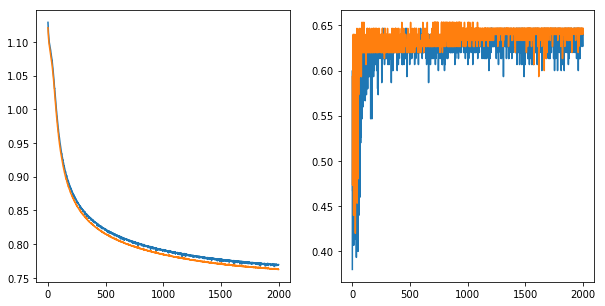

In [30]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['acc'])
ax2.plot(history.history['val_acc'])
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
modeltemp = load_model('bestfit.hdf5')
evaluation = modeltemp.evaluate(data,target,verbose=0)
print("Error: ",evaluation[0])
print("Precision: ",evaluation[1])
y_pred = model.predict(data)
CM = confusion_matrix(np.argmax(target,axis=1),np.argmax(y_pred,axis=1))
print("Confusion C_(i,j) -> i: predicted, j: actual. ")
print(CM)

Error:  0.762399772008
Precision:  0.646666662693
Confusion C_(i,j) -> i: predicted, j: actual. 
[[50  0  0]
 [28 22  0]
 [25  0 25]]


Two points are notice worthy:
1. Our intention in this notebook is not to generate the best possible classificator, but to provide insight and visualization of how deep learning can be very useful for process fault identification. On all of our attempts, we will make a restriction that the last hidden layer have only two neurons, so we can plot in a cartesian plane what the artificial intelligence is seeing. In other words, we are mainly solving an auto-encoder problem. 
2. We are not using any test set, at least in the beginning, since we intend mostly to extract some insight on the training data itself.
So, to envision how the output layer sees the problem arising from the hidden layer, we plot the latter's outputs. 

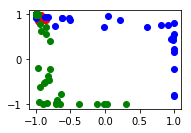

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
swap = model
model = modeltemp
modeltemp = swap
inter1 = Model(inputs=model.input, outputs=model.get_layer('l1').output)
interout1 = inter1.predict(data)
ax1.plot(interout1[i[0]:i[1],1],interout1[i[0]:i[1],0],'ro',
         interout1[i[1]:i[2],1],interout1[i[1]:i[2],0],'bo',
         interout1[i[2]:i[3],1],interout1[i[2]:i[3],0],'go')
plt.show()

As we can see, it is difficult to correctly distinguish the operation states in such a messy nonlinear transformation. Of course we could increase the number of hidden neurons. This would probably render well separated regions in the n-dimensional space and a good classification. [to be continued...]

[excerpt]
### In practice the theory is very different
The above description of our problem a much idealized condition. In real life, however, any measurement is subject to random noise. In our case, the main source of noise arises from the instruments i.e. the thermometer and the densimeter (yes, we mostly read alcohol concentration by its density). To account for this problem, 